## STEP 1 : Updating scikit-learn with pip

To update your scikit-learn package using pip, you can execute the following command:

This command utilizes pip, the Python package installer, to upgrade the scikit-learn library to the latest version available on the Python Package Index (PyPI). The `--upgrade` flag ensures that if a newer version exists, it will be installed, replacing any older versions present on your system.



> Indented block



In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.metrics import mean_squared_error  # For evaluating model performance
from math import sqrt  # For square root function
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, SGDRegressor, PassiveAggressiveRegressor, OrthogonalMatchingPursuit, Lars, LassoLars, HuberRegressor, ARDRegression, TheilSenRegressor, RANSACRegressor  # Linear regression and regularized regression models
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor  # K-nearest neighbors regressor models
from sklearn.tree import DecisionTreeRegressor  # Decision tree regressor model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Random forest and gradient boosting regressor models
from sklearn.svm import SVR  # Support vector regressor model
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visualizations
import statsmodels.api as sm  # For statistical modeling
from sklearn.pipeline import make_pipeline  # For creating a pipeline of transformations
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import QuantileRegressor  # Quantile regression model
from sklearn import linear_model, neighbors, tree  # For various regression models
from sklearn.metrics import mean_squared_error  # For evaluating model performance
import numpy as np  # For numerical computing
from sklearn.pipeline import make_pipeline  # For creating a pipeline of transformations
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import BayesianRidge, SGDRegressor, PassiveAggressiveRegressor, OrthogonalMatchingPursuit, Lars, LassoLars, HuberRegressor, ARDRegression, RANSACRegressor, TheilSenRegressor  # Additional regression models



### Reading Data from CSV Files

1. **Data Retrieval**: Two datasets, one named "test.csv" and the other "train.csv", are being loaded.
  
2. **Loading Process**: The content of each CSV file is being loaded into separate DataFrames.
  
3. **Data Separation**: One DataFrame is assigned to hold the data from "test.csv", while the other DataFrame holds the data from "train.csv".
  
4. **Location Specification**: The location of the CSV files is indicated by the "./" notation, suggesting that they are located in the current directory.
  
5. **Library Usage**: The code employs functionality from a library called "pandas", which is commonly used for data manipulation and analysis in Python.

In [ ]:

# Reading the test.csv file and storing it in a DataFrame called df_test
df_test = pd.read_csv("./test.csv")

# Reading the train.csv file and storing it in a DataFrame called df_train
df_train = pd.read_csv("./train.csv")

## STEP 2 : BASIC DATA EXPLORATION

## Data Summary with `df_train.info()`

1. **Information Request**: The code is requesting information about the DataFrame named `df_train`.

2. **Data Summary**: The `.info()` method provides a concise summary of the DataFrame's structure and content.

3. **Data Inspection**: This summary includes details such as the total number of entries, the data type of each column, and the number of non-null values in each column.

4. **Column Details**: For each column, it displays its name, the count of non-null values, and the data type.

5. **Use of Pandas**: This operation utilizes functionality from the pandas library, commonly used for data manipulation and analysis in Python.

In [ ]:
# Displaying concise summary information about the df_train DataFrame
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entry_id                  4410 non-null   object 
 1   Publisher Name            4410 non-null   object 
 2   Keyword                   4410 non-null   object 
 3   Match Type                4366 non-null   object 
 4   Campaign                  4410 non-null   object 
 5   Keyword Group             4410 non-null   object 
 6   Category                  4410 non-null   object 
 7   Bid Strategy              3217 non-null   object 
 8   Status                    4410 non-null   object 
 9   Search Engine Bid         4410 non-null   object 
 10  Clicks                    4410 non-null   object 
 11  Click Charges             4410 non-null   object 
 12  Avg. Cost per Click       4410 non-null   object 
 13  Impressions               4410 non-null   object 
 14  Engine C

## Summary of DataFrame df_test with df_test.info()


In [ ]:
# Displaying concise summary information about the df_test DataFrame
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entry_id                  100 non-null    object 
 1   Publisher Name            100 non-null    object 
 2   Keyword                   100 non-null    object 
 3   Match Type                96 non-null     object 
 4   Campaign                  100 non-null    object 
 5   Keyword Group             100 non-null    object 
 6   Category                  100 non-null    object 
 7   Bid Strategy              69 non-null     object 
 8   Status                    100 non-null    object 
 9   Search Engine Bid         100 non-null    object 
 10  Clicks                    100 non-null    object 
 11  Click Charges             100 non-null    object 
 12  Avg. Cost per Click       100 non-null    object 
 13  Impressions               100 non-null    object 
 14  Engine Clic

In [ ]:
df_train.head()

,entry_id,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,mkt_001,Google - Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,$1.25,...,$14.31,$0.95,380,3.95%,1.85,0.00%,$0.00,$0.00,$14.31,0
1,mkt_002,Yahoo - US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,NaN,Paused,$6.25,...,$5.71,$5.71,25,4.00%,1.84,0.00%,$0.00,$0.00,$5.71,0
2,mkt_003,Overture - Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,$0.45,...,$5.99,$0.43,"2,315",0.60%,4.48,0.00%,$0.00,$0.00,$5.99,0
3,mkt_005,Yahoo - US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,NaN,Paused,$6.25,...,$22.04,$2.45,86,10.47%,1.42,0.00%,$0.00,$0.00,$22.04,0
4,mkt_006,Google - US,cont:google_yearlong 2006::google|marrakech,NaN,Google_Yearlong 2006,Google|marrakech,uncategorized,NaN,Unavailable,$7.50,...,$4.63,$4.63,19,5.26%,1.53,0.00%,$0.00,$0.00,$4.63,0


In [ ]:
# Define a list of column names to clean by removing '%' and '$' and converting to float
columns_to_clean = ['Search Engine Bid', 'Clicks', 'Click Charges', 'Impressions', 'Avg. Cost per Click', 'Engine Click Thru %', 'Trans. Conv. %', 'Avg. Pos.', 'Total Cost/ Trans.', 'Amount', 'Total Cost']

# Iterate through each column in the list and clean the data accordingly
for col in columns_to_clean:
    df_train[col] = df_train[col].replace({'\$': '', '%': '', ',': ''}, regex=True).astype(float)

# Display concise summary information about the df_train DataFrame after cleaning
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entry_id                  4410 non-null   object 
 1   Publisher Name            4410 non-null   object 
 2   Keyword                   4410 non-null   object 
 3   Match Type                4366 non-null   object 
 4   Campaign                  4410 non-null   object 
 5   Keyword Group             4410 non-null   object 
 6   Category                  4410 non-null   object 
 7   Bid Strategy              3217 non-null   object 
 8   Status                    4410 non-null   object 
 9   Search Engine Bid         4410 non-null   float64
 10  Clicks                    4410 non-null   float64
 11  Click Charges             4410 non-null   float64
 12  Avg. Cost per Click       4410 non-null   float64
 13  Impressions               4410 non-null   float64
 14  Engine C

In [ ]:
# Define a list of column names to clean by removing '%' and '$' and converting to float
columns_to_clean = ['Search Engine Bid', 'Clicks', 'Click Charges', 'Impressions', 'Avg. Cost per Click', 'Engine Click Thru %', 'Trans. Conv. %', 'Avg. Pos.', 'Total Cost/ Trans.', 'Amount', 'Total Cost']

# Iterate through each column in the list and clean the data accordingly for the df_test DataFrame
for col in columns_to_clean:
    df_test[col] = df_test[col].replace({'\$': '', '%': '', ',': ''}, regex=True).astype(float)

# Display concise summary information about the df_test DataFrame after cleaning
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entry_id                  100 non-null    object 
 1   Publisher Name            100 non-null    object 
 2   Keyword                   100 non-null    object 
 3   Match Type                96 non-null     object 
 4   Campaign                  100 non-null    object 
 5   Keyword Group             100 non-null    object 
 6   Category                  100 non-null    object 
 7   Bid Strategy              69 non-null     object 
 8   Status                    100 non-null    object 
 9   Search Engine Bid         100 non-null    float64
 10  Clicks                    100 non-null    float64
 11  Click Charges             100 non-null    float64
 12  Avg. Cost per Click       100 non-null    float64
 13  Impressions               100 non-null    float64
 14  Engine Clic

## Exploring Categorical Data in a DataFrame

In this code snippet, we are analyzing categorical data within a DataFrame (`df_train`). Here's a breakdown of what's happening:

1. **Identification of Categorical Columns**:
   - We first identify all columns in the DataFrame `df_train` that have an object data type (typically indicating categorical variables). These columns are stored in the variable `object_cols` using the `select_dtypes` method.

2. **Iteration through Categorical Columns**:
   - We then iterate through each column identified as categorical (`object_cols`).
   
3. **Printing Unique Values and Counts**:
   - For each categorical column, we print the column name along with its unique values and their respective counts. This is achieved using the `value_counts()` method on the specific column.
   - This provides insight into the distribution and frequency of each unique value within the categorical variable.
   
4. **Visualization of Data**:
   - By printing the unique values and their counts, we gain an understanding of the variability and prevalence of different categories within each categorical variable.

Overall, this code snippet facilitates the exploration and understanding of categorical data within the DataFrame, which is crucial for various data analysis and modeling tasks.

In [ ]:
# Get all columns with object data type
object_cols = df_train.select_dtypes(include=['object']).columns

# Iterate through each object-type column and print unique values with their counts
for col in object_cols:
    print(f"Unique values and their counts for {col}:")
    print(df_train[col].value_counts())
    print()


Unique values and their counts for entry_id:
mkt_001     1
mkt_3637    1
mkt_3642    1
mkt_3641    1
mkt_3640    1
           ..
mkt_2276    1
mkt_2277    1
mkt_2278    1
mkt_2279    1
mkt_999     1
Name: entry_id, Length: 4410, dtype: int64

Unique values and their counts for Publisher Name:
Google - US          2033
Overture - US         643
Yahoo - US            624
Overture - Global     537
Google - Global       381
MSN - Global           96
MSN - US               96
Name: Publisher Name, dtype: int64

Unique values and their counts for Keyword:
paris airline                  20
paris flight                   18
international flight           18
international airfare          18
paris airfare                  17
                               ..
cheap new york paris flight     1
airline milan ticket            1
air ticket sale                 1
split flights                   1
[venice cheap flight]           1
Name: Keyword, Length: 2058, dtype: int64

Unique values and their cou

The code snippet provided performs the following operations on the DataFrame `df_test`:

1. **Identification of Categorical Columns**:
   - It selects all columns with an object data type in the `df_test` DataFrame using the `select_dtypes` method. These columns are stored in the variable `object_cols`.

2. **Iteration through Categorical Columns**:
   - It iterates through each column identified as having an object data type (`object_cols`).

3. **Printing Unique Values and Counts**:
   - For each categorical column, it prints the column name and the unique values along with their respective counts using the `value_counts()` method.
   - This provides a summary of the unique values and their occurrences within each categorical variable.

4. **Visualization of Data**:
   - By printing the unique values and their counts, it offers insight into the distribution and prevalence of different categories within each categorical variable in the `df_test` DataFrame.



In [ ]:
# Get all columns with object data type in the df_test DataFrame
object_cols = df_test.select_dtypes(include=['object']).columns

# Iterate through each object-type column and print unique values with their counts
for col in object_cols:
    print(f"Unique values and their counts for {col}:")
    print(df_test[col].value_counts())
    print()


Unique values and their counts for entry_id:
mkt_4036    1
mkt_2489    1
mkt_2791    1
mkt_1378    1
mkt_2191    1
           ..
mkt_4409    1
mkt_685     1
mkt_2114    1
mkt_093     1
mkt_3040    1
Name: entry_id, Length: 100, dtype: int64

Unique values and their counts for Publisher Name:
Google - US          38
Overture - US        18
Overture - Global    16
Google - Global      12
Yahoo - US           11
MSN - Global          3
MSN - US              2
Name: Publisher Name, dtype: int64

Unique values and their counts for Keyword:
air france com          2
france airline          2
paris cheap ticket      2
flight to nice          1
turkey tickets          1
                       ..
airfrance us            1
discount airfare        1
flights to nice         1
airfrance tickets       1
budget travel france    1
Name: Keyword, Length: 97, dtype: int64

Unique values and their counts for Match Type:
Broad       50
Advanced    26
Standard    19
Exact        1
Name: Match Type, dtype: 

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Get all numerical columns
# numerical_cols = df_train.select_dtypes(include=['float', 'int']).columns

# # Plot histograms for each numerical column
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df_train[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

## Conversion of Categorical Variables in Training Data

In our data preprocessing pipeline, we perform categorical variable conversion for three key features: Match Type, Bid Strategy, and Status. This conversion involves mapping categorical labels to numerical values, facilitating the utilization of these features in machine learning models.

### Match Type Conversion
We map the 'Match Type' feature using a predefined mapping dictionary, converting labels such as 'Exact', 'Advanced', 'Standard', and 'Broad' to corresponding numerical values (4, 3, 2, and 1 respectively). This conversion enables the model to interpret and utilize the match type information effectively.

### Bid Strategy Conversion
Similar to 'Match Type', the 'Bid Strategy' feature undergoes conversion using a mapping dictionary. Various bid strategies like 'Position 1-2 Target', 'Position 1-4 Bid Strategy', etc., are mapped to numerical values, reflecting their priority or significance in the bidding process. However, note that the provided mappings are simplified and should be adjusted based on the specific strategy priorities in the context of the dataset.

### Status Conversion
For the 'Status' feature, categorical labels such as 'Live', 'Sent', 'Paused', etc., are mapped to numerical values (5, 4, 3, 2, and 1 respectively) using a mapping dictionary. This conversion assists in representing the current status of the data points numerically, facilitating model training and analysis.

### Verification
To ensure the correctness of the conversions, we display the first few rows of the transformed dataframe, showcasing the numerical representations of 'Match Type', 'Bid Strategy', and 'Status'. This verification step confirms the successful conversion of categorical variables into a format suitable for machine learning tasks.

In [ ]:
# Match Type conversion
match_type_mapping = {
    'Exact': 4,
    'Advanced': 3,
    'Standard': 2,
    'Broad': 1
}
df_train['Match Type'] = df_train['Match Type'].map(match_type_mapping)

# Bid Strategy conversion (example mapping, adjust as needed)
bid_strategy_mapping = {
    'Position 1-2 Target': 5,  # Adjust these rankings based on actual strategy priorities
    'Position 1- 3': 4,
    'Position 1-4 Bid Strategy': 3,
    'Position 2-5 Bid Strategy': 2,
    'Position 5-10 Bid Strategy': 1,
    'Pos 3-6': 1,  # Example, adjust as needed
    'Postiion 1-4 Bid Strategy': 3,  # Example, adjust as needed
    'Position 1 -2 Target': 5  # Example, adjust as needed
}
df_train['Bid Strategy'] = df_train['Bid Strategy'].map(bid_strategy_mapping)

# Status conversion
status_mapping = {
    'Live': 5,
    'Sent': 4,
    'Paused': 3,
    'Unavailable': 2,
    'Deactivated': 1
}
df_train['Status'] = df_train['Status'].map(status_mapping)

# Note: The mappings for Bid Strategy are quite simplified and should be refined based on your understanding of their importance.

# Display the first few rows to verify changes
print(df_train[['Match Type', 'Bid Strategy', 'Status']].head())


   Match Type  Bid Strategy  Status
0         1.0           4.0       2
1         3.0           NaN       3
2         3.0           5.0       4
3         3.0           NaN       3
4         NaN           NaN       2


## Conversion of Categorical Variables in Test Data

Similar to the preprocessing steps applied to the training data, we conduct categorical variable conversion for the test data. This ensures consistency in data representation and prepares the test dataset for model evaluation.

### Match Type Conversion
Using a predefined mapping dictionary, we convert the categorical labels of 'Match Type' ('Exact', 'Advanced', 'Standard', and 'Broad') to corresponding numerical values (4, 3, 2, and 1 respectively). This conversion aligns the format of 'Match Type' in the test data with that of the training data, enabling seamless analysis and evaluation.

### Bid Strategy Conversion
The 'Bid Strategy' feature in the test dataset undergoes conversion based on a mapping dictionary, similar to the training data. Various bid strategies are mapped to numerical values, reflecting their priority or significance in the bidding process. However, it's important to note that the provided mappings are simplified and should be adjusted based on the actual strategy priorities in the context of the test dataset.

### Status Conversion
For the 'Status' feature, categorical labels such as 'Live', 'Sent', 'Paused', etc., are mapped to numerical values (5, 4, 3, 2, and 1 respectively) using a mapping dictionary. This conversion ensures consistency in representing the status of data points across both training and test datasets.

### Verification
To validate the correctness of the conversions, we display the first few rows of the transformed test dataframe, showcasing the numerical representations of 'Match Type', 'Bid Strategy', and 'Status'. This verification step confirms that the categorical variables in the test dataset have been appropriately converted into numerical format, ready for model evaluation.

In [ ]:
# Match Type conversion
match_type_mapping = {
    'Exact': 4,
    'Advanced': 3,
    'Standard': 2,
    'Broad': 1
}
df_test['Match Type'] = df_test['Match Type'].map(match_type_mapping)

# Bid Strategy conversion (example mapping, adjust as needed)
bid_strategy_mapping = {
    'Position 1-2 Target': 5,  # Adjust these rankings based on actual strategy priorities
    'Position 1- 3': 4,
    'Position 1-4 Bid Strategy': 3,
    'Position 2-5 Bid Strategy': 2,
    'Position 5-10 Bid Strategy': 1,
    'Pos 3-6': 1,  # Example, adjust as needed
    'Postiion 1-4 Bid Strategy': 3,  # Example, adjust as needed
    'Position 1 -2 Target': 5  # Example, adjust as needed
}
df_test['Bid Strategy'] = df_test['Bid Strategy'].map(bid_strategy_mapping)

# Status conversion
status_mapping = {
    'Live': 5,
    'Sent': 4,
    'Paused': 3,
    'Unavailable': 2,
    'Deactivated': 1
}
df_test['Status'] = df_test['Status'].map(status_mapping)

# Note: The mappings for Bid Strategy are quite simplified and should be refined based on your understanding of their importance.

# Display the first few rows to verify changes
print(df_test[['Match Type', 'Bid Strategy', 'Status']].head())


   Match Type  Bid Strategy  Status
0         3.0           5.0       3
1         3.0           5.0       3
2         4.0           4.0       2
3         1.0           4.0       2
4         3.0           3.0       3


## Encoding Techniques Applied to Training Data

In the data preprocessing stage, various encoding techniques are applied to transform categorical variables into numerical representations, ensuring compatibility with machine learning algorithms.

### One-Hot Encoding for Publisher Name
Given the categorical nature of the 'Publisher Name' feature, one-hot encoding is employed. This technique expands the single categorical column into multiple binary columns, each indicating the presence or absence of a particular publisher name.

### Frequency Encoding for Keyword and Keyword Group
For 'Keyword' and 'Keyword Group' features, frequency encoding is utilized. This approach replaces categorical labels with their corresponding frequencies within the dataset. Each label is mapped to its occurrence count, providing numerical representations proportional to their prevalence in the data.

### Label Encoding for Campaign and Category
Label encoding is applied to 'Campaign' and 'Category' features. Label encoding assigns a unique numerical label to each category in the feature. This transformation facilitates the utilization of these categorical variables in machine learning models by converting them into ordinal representations.

### Verification
To ensure the correctness of the encoding processes, the first few rows of the transformed dataframe are displayed. This verification step confirms that categorical variables have been successfully converted into numerical formats, ready for further analysis and model training.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming df_train is your DataFrame


# One-Hot Encoding for 'Publisher Name'
# Note: Consider the number of unique values to decide if one-hot encoding is appropriate
one_hot_cols = ['Publisher Name']
df_train = pd.get_dummies(df_train, columns=one_hot_cols)

# Frequency Encoding for 'Keyword' and 'Keyword Group'
for col in ['Keyword', 'Keyword Group']:
    frequency_map = df_train[col].value_counts().to_dict()
    df_train[col] = df_train[col].map(frequency_map)

# Label Encoding for 'Campaign' and 'Category' (if you decide it's appropriate)
label_encoder = LabelEncoder()
label_encode_cols = ['Campaign', 'Category']
for col in label_encode_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

# Display the first few rows to verify changes
print(df_train.head())


  entry_id  Keyword  Match Type  Campaign  Keyword Group  Category  \
0  mkt_001        7         1.0         2             87        90   
1  mkt_002        3         3.0        23              2       117   
2  mkt_003        2         3.0        22           1180        96   
3  mkt_005       10         3.0        13              1       117   
4  mkt_006        1         NaN        19              2       117   

   Bid Strategy  Status  Search Engine Bid  Clicks  ...  Amount  Total Cost  \
0           4.0       2               1.25    15.0  ...     0.0       14.31   
1           NaN       3               6.25     1.0  ...     0.0        5.71   
2           5.0       4               0.45    14.0  ...     0.0        5.99   
3           NaN       3               6.25     9.0  ...     0.0       22.04   
4           NaN       2               7.50     1.0  ...     0.0        4.63   

   Total Volume of Bookings  Publisher Name_Google - Global  \
0                         0              

## Encoding Techniques Applied to Test Data

Similar to the preprocessing steps applied to the training data, encoding techniques are employed to transform categorical variables into numerical representations in the test dataset. This ensures consistency in data format and prepares the test data for model evaluation.

### One-Hot Encoding for Publisher Name
For the categorical feature 'Publisher Name', one-hot encoding is utilized. This method expands the single categorical column into multiple binary columns, each representing the presence or absence of a particular publisher name.

### Frequency Encoding for Keyword and Keyword Group
The 'Keyword' and 'Keyword Group' features undergo frequency encoding. This technique maps categorical labels to their respective frequencies within the dataset. Each label is replaced with its occurrence count, providing numerical representations proportional to their prevalence in the test data.

### Label Encoding for Campaign and Category
Label encoding is applied to 'Campaign' and 'Category' features using the LabelEncoder from scikit-learn. This process assigns a unique numerical label to each category in the feature, enabling their utilization in machine learning models by converting them into ordinal representations.

### Verification
To confirm the accuracy of the encoding transformations, the first few rows of the transformed test dataframe are displayed. This verification step ensures that categorical variables have been successfully converted into numerical formats, maintaining consistency with the training data and facilitating model evaluation.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming df_test is your DataFrame


# One-Hot Encoding for 'Publisher Name'
# Note: Consider the number of unique values to decide if one-hot encoding is appropriate
one_hot_cols = ['Publisher Name']
df_test = pd.get_dummies(df_test, columns=one_hot_cols)

# Frequency Encoding for 'Keyword' and 'Keyword Group'
for col in ['Keyword', 'Keyword Group']:
    frequency_map = df_test[col].value_counts().to_dict()
    df_test[col] = df_test[col].map(frequency_map)

# Label Encoding for 'Campaign' and 'Category' (if you decide it's appropriate)
label_encoder = LabelEncoder()
label_encode_cols = ['Campaign', 'Category']
for col in label_encode_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])

# Display the first few rows to verify changes
print(df_test.head())

   entry_id  Keyword  Match Type  Campaign  Keyword Group  Category  \
0  mkt_4036        1         3.0        16             34        15   
1  mkt_2533        1         3.0        16             34         0   
2  mkt_4114        1         4.0         2              1         0   
3  mkt_3635        2         1.0         2              6         1   
4  mkt_1937        1         3.0        16             34         8   

   Bid Strategy  Status  Search Engine Bid   Clicks  ...     Amount  \
0           5.0       3               1.01    415.0  ...    3675.40   
1           5.0       3               0.68  15320.0  ...  232938.25   
2           4.0       2               1.25  11150.0  ...  235965.95   
3           4.0       2               0.00    661.0  ...   11950.15   
4           3.0       3               1.26   2915.0  ...    4911.30   

   Total Cost  Total Volume of Bookings  Publisher Name_Google - Global  \
0      288.47                       NaN                               0

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   entry_id                          4410 non-null   object 
 1   Keyword                           4410 non-null   int64  
 2   Match Type                        4366 non-null   float64
 3   Campaign                          4410 non-null   int64  
 4   Keyword Group                     4410 non-null   int64  
 5   Category                          4410 non-null   int64  
 6   Bid Strategy                      3217 non-null   float64
 7   Status                            4410 non-null   int64  
 8   Search Engine Bid                 4410 non-null   float64
 9   Clicks                            4410 non-null   float64
 10  Click Charges                     4410 non-null   float64
 11  Avg. Cost per Click               4410 non-null   float64
 12  Impres

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   entry_id                          100 non-null    object 
 1   Keyword                           100 non-null    int64  
 2   Match Type                        96 non-null     float64
 3   Campaign                          100 non-null    int64  
 4   Keyword Group                     100 non-null    int64  
 5   Category                          100 non-null    int64  
 6   Bid Strategy                      69 non-null     float64
 7   Status                            100 non-null    int64  
 8   Search Engine Bid                 100 non-null    float64
 9   Clicks                            100 non-null    float64
 10  Click Charges                     100 non-null    float64
 11  Avg. Cost per Click               100 non-null    float64
 12  Impressio

In [ ]:
# df_train.to_csv('train_1.csv', index=False)
# df_test.to_csv('test_1.csv', index=False)

## Dataset Loading and Handling Missing Values

We load the training and test datasets, and subsequently handle any missing values present in the data.

### Dataset Loading
- The training dataset is loaded into `train_df`, while the test dataset is loaded into `test_df`, ensuring both are ready for further processing.

### Handling Missing Values
- Initially, we check for missing values in both the training and test datasets.
- After identifying missing values, we fill them with zero (0) using the `fillna()` method, ensuring a consistent representation of missing data across both datasets.
- Another check is performed to confirm that no missing values remain after the filling operation.

### Summary of Missing Values
- Before filling missing values:
  - `train_df`: `missing_values_train`
  - `test_df`: `missing_values_test`
- After filling missing values:
  - `train_df`: `missing_values_train`
  - `test_df`: `missing_values_test`

This process ensures that the datasets are devoid of missing values, preparing them for subsequent analysis and modeling.

In [ ]:
# Load your datasets
train_df = df_train
test_df = df_test


# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train, missing_values_test

train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train, missing_values_test


(entry_id                            0
 Keyword                             0
 Match Type                          0
 Campaign                            0
 Keyword Group                       0
 Category                            0
 Bid Strategy                        0
 Status                              0
 Search Engine Bid                   0
 Clicks                              0
 Click Charges                       0
 Avg. Cost per Click                 0
 Impressions                         0
 Engine Click Thru %                 0
 Avg. Pos.                           0
 Trans. Conv. %                      0
 Total Cost/ Trans.                  0
 Amount                              0
 Total Cost                          0
 Total Volume of Bookings            0
 Publisher Name_Google - Global      0
 Publisher Name_Google - US          0
 Publisher Name_MSN - Global         0
 Publisher Name_MSN - US             0
 Publisher Name_Overture - Global    0
 Publisher Name_Overture 

## Correlation Analysis with Target Variable

We conduct correlation analysis to identify features that exhibit the highest correlation with the target variable, 'Total Volume of Bookings'.

### Calculating Correlation Matrix
- The correlation matrix is computed based on the training dataset, encompassing the relationships between all features.

### Extracting Correlation with Target Variable
- From the correlation matrix, correlations with the target variable are extracted and sorted in descending order.
- This reveals the strength and direction of correlation between each feature and the target variable.

### Identifying Relevant Features
- To focus on features most correlated with the target variable, we disregard the correlation of the target variable with itself.
- The resulting list represents features sorted by their absolute correlation values with the target variable, showcasing the most influential features for prediction.

### Summary of Relevant Features
- The 'relevant_features' list contains features with the highest correlation with the target variable, 'Total Volume of Bookings', sorted in descending order of correlation strength.

This analysis aids in understanding the relationships between features and the target variable, guiding feature selection and model development processes.

In [ ]:


# Calculate correlation matrix
correlation_matrix = train_df.corr()

# Extract correlation with the target variable 'Total Volume of Bookings'
target_correlation = correlation_matrix['Total Volume of Bookings'].sort_values(ascending=False)

# Identify features with the highest correlation with the target variable
# Ignoring the target variable correlation with itself
relevant_features = target_correlation[1:].abs().sort_values(ascending=False)

relevant_features


<ipython-input-20-cd7cdecda6f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


Amount                              0.994113
Clicks                              0.816076
Total Cost                          0.537651
Click Charges                       0.537651
Search Engine Bid                   0.131711
Campaign                            0.089220
Impressions                         0.085802
Status                              0.062698
Avg. Cost per Click                 0.042599
Match Type                          0.040270
Total Cost/ Trans.                  0.038044
Avg. Pos.                           0.031529
Keyword                             0.023339
Publisher Name_Google - Global      0.021326
Trans. Conv. %                      0.018226
Keyword Group                       0.018048
Bid Strategy                        0.017379
Publisher Name_Overture - Global    0.015057
Publisher Name_Overture - US        0.012927
Engine Click Thru %                 0.010956
Category                            0.010730
Publisher Name_Yahoo - US           0.009908
Publisher 

## OLS Regression Analysis

In this section, we perform Ordinary Least Squares (OLS) regression analysis to model the relationship between independent variables and the target variable, 'Total Volume of Bookings'.

### Data Cleaning
- Rows with missing values are removed from the training dataset, resulting in a cleaned dataframe (`df_train_cleaned`).

### Independent Variables
- Independent variables (features) are specified by excluding 'entry_id' and 'Total Volume of Bookings' columns from the cleaned dataframe.

### Adding Constant to Independent Variables
- A constant term is added to the independent variables using `sm.add_constant()` from the statsmodels library. This ensures the model includes an intercept term.

### Dependent Variable
- The target variable, 'Total Volume of Bookings', is specified as the dependent variable.

### Fitting OLS Model
- An OLS regression model is fitted using `sm.OLS()` from the statsmodels library, with the dependent and independent variables.

### Model Summary
- The summary of the fitted OLS model is printed, providing detailed information about the model's performance, coefficients, significance levels, and goodness-of-fit statistics.

This analysis offers insights into the relationship between independent variables and the target variable, aiding in understanding factors influencing the total volume of bookings and facilitating predictive modeling efforts.

In [ ]:


# Remove rows with missing values
df_train_cleaned = df_train.dropna()

# Specify independent variables (features)
independent_vars = df_train_cleaned.drop(columns=['entry_id', 'Total Volume of Bookings'])

# Add constant to independent variables
independent_vars = sm.add_constant(independent_vars)

# Dependent variable
dependent_var = df_train_cleaned['Total Volume of Bookings']

# Fit OLS model
model = sm.OLS(dependent_var, independent_vars).fit()

# Print summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Total Volume of Bookings   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                 1.801e+04
Date:                      Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                              05:13:54   Log-Likelihood:                -6988.7
No. Observations:                      4410   AIC:                         1.403e+04
Df Residuals:                          4386   BIC:                         1.418e+04
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------


### Understanding Correlation Heatmaps
In our analysis, we utilize a correlation heatmap to gain insights into the relationships between variables within our dataset, represented as a DataFrame named `df_train`.

### Step 1: Calculating Correlation Matrix
We begin by computing the correlation matrix using the `.corr()` method. This matrix contains correlation coefficients, indicating the strength and direction of linear relationships between pairs of variables.

### Step 2: Visualizing the Correlation Matrix
To visualize the correlations effectively, we employ the Seaborn library, a powerful tool for statistical visualization in Python. With Seaborn's `heatmap` function, we plot the correlation matrix as a heatmap.

### Customization Options
We customize the heatmap by specifying parameters such as figure size, annotations to display correlation values within cells, colormap for color representation (we choose 'coolwarm'), format for annotations (set to two decimal places), and adjusting linewidths for clarity.

### Interpretation of the Heatmap
The resulting heatmap provides an intuitive visual representation of correlations between variables in our dataset. Warm colors indicate positive correlations, while cooler colors denote negative correlations. Each cell contains an annotation showing the precise correlation coefficient between corresponding variables.

### Importance of Correlation Heatmaps
This visualization aids in understanding the interplay between different variables, identifying patterns, and uncovering potential dependencies within the dataset. By visualizing correlations, we can make informed decisions in data analysis, feature selection, and model building processes.

<ipython-input-22-365529617e95>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


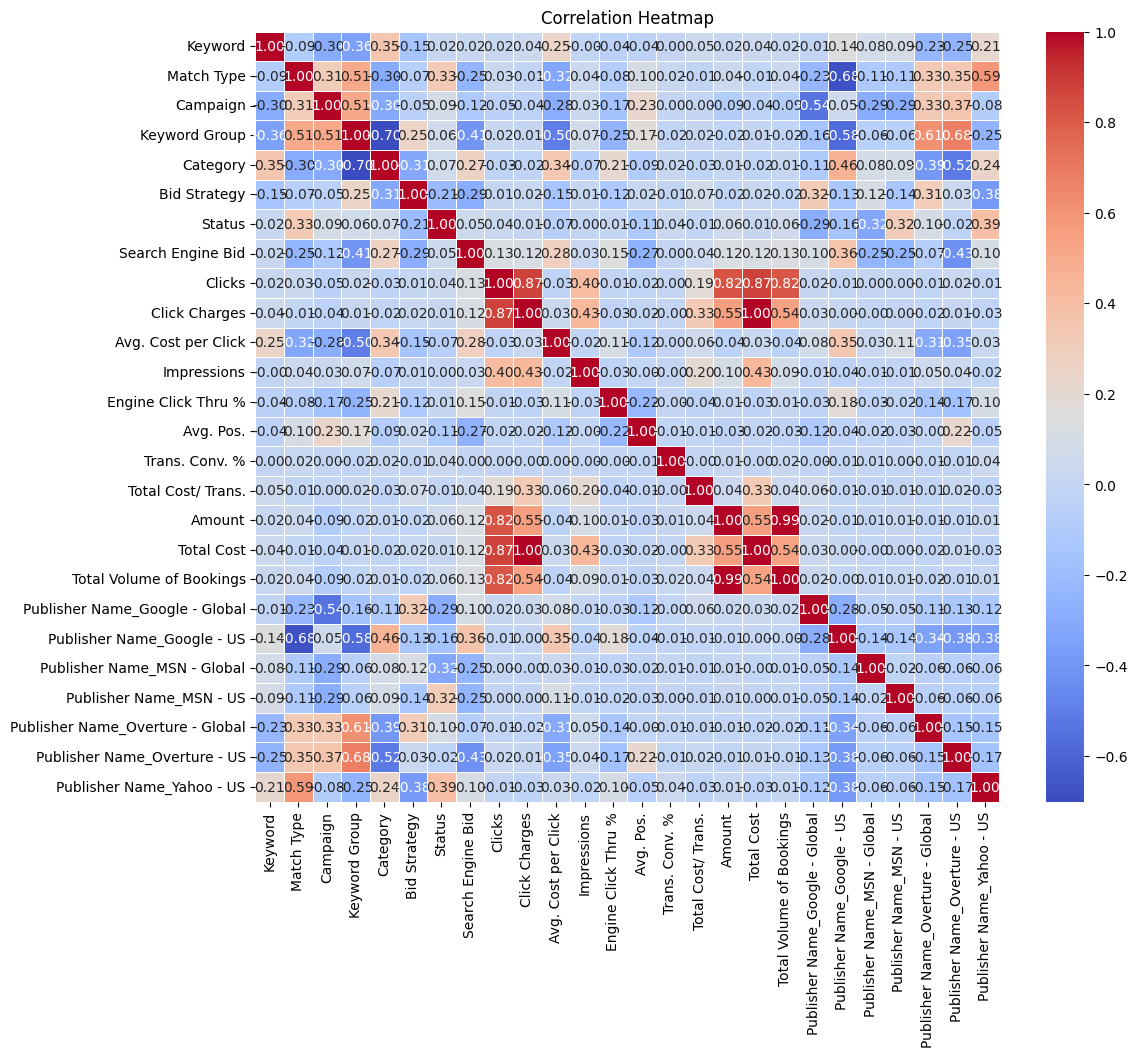

In [ ]:


# Assuming df_train is your DataFrame
# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Selecting Relevant Features and Implementing Linear Regression

In this summary, the process of selecting the most relevant features for a model and implementing linear regression is outlined. Initially, a set of features deemed important for the model is defined, including parameters such as 'Amount', 'Search Engine Bid', 'Keyword', 'Bid Strategy', 'Status', 'Avg. Cost per Click', 'Engine Click Thru %', 'Avg. Pos.', and 'Trans. Conv. %'. These features are selected based on their potential significance in predicting the target variable, 'Total Volume of Bookings'.

Subsequently, the data is split into training and validation sets using the `train_test_split` function, with 80% of the data allocated for training and 20% for validation, ensuring the model's generalizability. The `LinearRegression` model is then instantiated and trained using the training data.

After training, predictions are made on the validation set (`X_val`), and the model's performance is evaluated using the Root Mean Squared Error (RMSE) metric. RMSE is calculated by comparing the predicted values (`y_pred`) against the actual values (`y_val`). This metric provides an indication of how well the model's predictions align with the observed data.

By systematically selecting relevant features and implementing linear regression, this approach aims to develop a predictive model capable of estimating the total volume of bookings accurately. The RMSE serves as a quantitative measure of the model's performance, with lower values indicating better predictive accuracy.

In [ ]:


# Selecting the most relevant features for the model
# Excluding highly correlated features to avoid multicollinearity issues
features = ['Amount', 'Search Engine Bid','Keyword','Bid Strategy','Status','Search Engine Bid','Avg. Cost per Click','Engine Click Thru %','Avg. Pos.','Trans. Conv. %']
X = train_df[features]
y = train_df['Total Volume of Bookings']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the validation set
y_pred = model.predict(X_val)

# Calculating the Root Mean Squared Error (RMSE) for the validation set
rmse = mean_squared_error(y_val, y_pred, squared=False)

rmse



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.0069338332863564

## Model Selection and Hyperparameter Tuning

This section outlines the process of selecting a suitable model and tuning its hyperparameters for optimal performance. Initially, example hyperparameter grids are defined for three different models: Lasso Regression, Ridge Regression, and K-Nearest Neighbors (KNN). These grids contain various values for the respective hyperparameters, such as 'alpha' for Lasso and Ridge, and 'n_neighbors' and 'weights' for KNN.

Next, models are instantiated along with their corresponding parameter grids. These models, namely Lasso, Ridge, and KNeighborsRegressor, are organized into a list `models_and_params` alongside their respective parameter grids.

A function named `evaluate_model` is defined to conduct grid search cross-validation (`GridSearchCV`) for each model, optimizing hyperparameters based on the negative mean squared error (`scoring='neg_mean_squared_error'`). This function fits the grid search on the training data, identifies the best estimator, makes predictions on the validation set (`X_val`), calculates the RMSE, and returns the best parameters along with the RMSE score.

Results are stored in a list and then converted into a DataFrame `results_df` containing columns for Model name, Best Parameters, and RMSE. Finally, the DataFrame is displayed, presenting a summary of the performance of each model along with the optimal hyperparameters chosen through grid search.

In [ ]:



# Assuming X_train, X_val, y_train, y_val are already defined

# Example hyperparameter grids
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Setting up the models and their corresponding parameter grids
models_and_params = [
    (Lasso(), lasso_params),
    (Ridge(), ridge_params),
    (KNeighborsRegressor(), knn_params)
]

# Function to perform grid search and evaluate a model
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return grid_search.best_params_, rmse

# Dictionary to store the results
results = []

# Evaluate each model
for model, params in models_and_params:
    best_params, rmse = evaluate_model(model, params, X_train, y_train, X_val, y_val)
    results.append((model.__class__.__name__, best_params, rmse))

# Display the results
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'RMSE'])
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                 Model                                Best Params      RMSE
0                Lasso                             {'alpha': 1.0}  2.022690
1                Ridge                            {'alpha': 10.0}  2.006943
2  KNeighborsRegressor  {'n_neighbors': 3, 'weights': 'distance'}  1.436697


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Evaluation and RMSE Comparison

This section focuses on evaluating various regression models and comparing their performance based on the Root Mean Squared Error (RMSE) metric. Several regression models are initialized, including Ordinary Least Squares (OLS) Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, K-Nearest Neighbors, Decision Tree Regressor, Bayesian Ridge Regression, Theil-Sen Regression, SGD Regression, RANSAC Regression, Radius Neighbors Regressor, Passive Aggressive Regression, Orthogonal Matching Pursuit, Least Angle Regression (LARS), LassoLars Regression, Huber Regression, and Automatic Relevance Detection (ARD).

A function named `train_and_evaluate` is defined to iterate over each model, train it on the training data (`X_train`, `y_train`), make predictions on the validation set (`X_val`), and calculate the RMSE. The results, including the model name and corresponding RMSE, are stored in a list.

After training and evaluation, the results are converted into a DataFrame `results_df` for better visualization. The DataFrame is sorted based on RMSE values in ascending order to identify the models with the lowest prediction errors.

Finally, the sorted RMSE results table is displayed, providing a comparative analysis of the regression models' performance, with lower RMSE values indicating better predictive accuracy. This allows for the identification of the most suitable regression model for the given dataset.

In [ ]:

# Assuming X_train, X_val, y_train, y_val are already defined

# Initialize models
models = {
    "OLS Linear Regression": linear_model.LinearRegression(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Elastic Net Regression": make_pipeline(StandardScaler(), SGDRegressor(loss='huber', penalty='elasticnet')),
    "K-Nearest Neighbors": neighbors.KNeighborsRegressor(),
    "Decision Tree Regressor": tree.DecisionTreeRegressor(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Theil-Sen Regression": TheilSenRegressor(),
    "SGD Regression": SGDRegressor(),
    "RANSAC Regression": RANSACRegressor(),
    "Radius Neighbors Regressor": neighbors.RadiusNeighborsRegressor(),
    "Passive Aggressive Regression": PassiveAggressiveRegressor(),
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "Least Angle Regression (LARS)": Lars(),
    "LassoLars Regression": LassoLars(),
    "Huber Regression": HuberRegressor(),
    "Automatic Relevance Detection (ARD)": ARDRegression(),
}

# Function to train models and calculate RMSE
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        results.append((name, rmse))
    return results

# Train models and calculate RMSE
results = train_and_evaluate(models, X_train, X_val, y_train, y_val)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])


# Sort the DataFrame by RMSE from lowest to highest
rmse_df_sorted = results_df.sort_values(by='RMSE', ascending=True)

# Display the sorted RMSE results table
print(rmse_df_sorted)

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


                                  Model          RMSE
5               Decision Tree Regressor  8.444832e-01
7                  Theil-Sen Regression  1.831519e+00
0                 OLS Linear Regression  2.006934e+00
13        Least Angle Regression (LARS)  2.006934e+00
2                      Ridge Regression  2.006935e+00
6             Bayesian Ridge Regression  2.018681e+00
1                      Lasso Regression  2.022690e+00
14                 LassoLars Regression  2.022690e+00
12          Orthogonal Matching Pursuit  2.022806e+00
15                     Huber Regression  2.165954e+00
11        Passive Aggressive Regression  3.058543e+00
4                   K-Nearest Neighbors  5.926045e+00
3                Elastic Net Regression  1.403161e+01
9                     RANSAC Regression  1.427654e+01
16  Automatic Relevance Detection (ARD)  1.433562e+01
8                        SGD Regression  4.036125e+17
10           Radius Neighbors Regressor  6.499688e+18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Model Evaluation and Selection

This section encompasses various aspects of model evaluation, selection, and hyperparameter tuning. Initially, a set of features is selected for modeling, focusing on excluding highly correlated features to mitigate multicollinearity issues. These features are utilized to split the data into training and validation sets, which are then used for model training and evaluation.

### Model Evaluation
A variety of regression models are evaluated using the training and validation sets. Models include OLS Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, K-Nearest Neighbors, Decision Tree Regressor, Bayesian Ridge Regression, and several others. For each model, RMSE (Root Mean Squared Error) is calculated to assess its predictive performance on the validation set.

### Hyperparameter Tuning
Hyperparameter tuning is performed for the ElasticNet model using a grid search approach. Various combinations of alpha and l1_ratio parameters are explored to find the optimal configuration, resulting in improved model performance.

Additionally, adjustments are made to the max_iter parameter for TheilSenRegressor and min_samples and max_trials parameters for RANSACRegressor to optimize their performance. These adjustments are tailored based on computational considerations and model behavior.

### Model Deployment and Prediction
Once the best hyperparameters are determined, the ElasticNet model is initialized and trained with the selected parameters. Subsequently, predictions are generated for the test set using the trained model. The predictions are formatted into a submission dataframe adhering to the required format, ensuring that booking volumes are whole numbers. Finally, the submission file is saved for further analysis or submission.

This comprehensive approach encompasses model evaluation, hyperparameter tuning, and deployment, facilitating the development of robust predictive models for the given dataset.

In [ ]:
# Selecting the most relevant features for the model
# Excluding highly correlated features to avoid multicollinearity issues
features = ['Amount', 'Search Engine Bid','Keyword','Bid Strategy','Status','Search Engine Bid','Avg. Cost per Click','Engine Click Thru %','Avg. Pos.','Trans. Conv. %']
X = train_df[features]
y = train_df['Total Volume of Bookings']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the validation set
y_pred = model.predict(X_val)

# Calculating the Root Mean Squared Error (RMSE) for the validation set
rmse = mean_squared_error(y_val, y_pred, squared=False)

rmse


# Assuming X_train, X_val, y_train, y_val are already defined

# Initialize models
models = {
    "OLS Linear Regression": linear_model.LinearRegression(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Elastic Net Regression": make_pipeline(StandardScaler(), SGDRegressor(loss='huber', penalty='elasticnet')),
    "K-Nearest Neighbors": neighbors.KNeighborsRegressor(),
    "Decision Tree Regressor": tree.DecisionTreeRegressor(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Theil-Sen Regression": TheilSenRegressor(),
    "SGD Regression": SGDRegressor(),
    "RANSAC Regression": RANSACRegressor(),
    "Radius Neighbors Regressor": neighbors.RadiusNeighborsRegressor(),
    "Passive Aggressive Regression": PassiveAggressiveRegressor(),
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "Least Angle Regression (LARS)": Lars(),
    "LassoLars Regression": LassoLars(),
    "Huber Regression": HuberRegressor(),
    "Automatic Relevance Detection (ARD)": ARDRegression(),
}

# Function to train models and calculate RMSE
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        results.append((name, rmse))
    return results

# Train models and calculate RMSE
results = train_and_evaluate(models, X_train, X_val, y_train, y_val)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])
print(results_df)


# ElasticNet Hyperparameter Tuning
elastic_net_params = {
    'alpha': [0.01,0.1, 1.0, 10.0],
    'l1_ratio': [0.01,0.1, 0.5, 0.9, 0.8, 0.7, 1, 0.995]
}
elastic_net_grid = GridSearchCV(ElasticNet(), elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train, y_train)
elastic_net_best_params = elastic_net_grid.best_params_
elastic_net_best_rmse = np.sqrt(-elastic_net_grid.best_score_)

# TheilSenRegressor and RANSACRegressor are more computationally expensive,
# so we'll use a simpler approach for demonstration purposes.

# TheilSenRegressor - Adjusting max_iter for example
theil_sen = TheilSenRegressor(max_iter=300)  # Default is 300
theil_sen.fit(X_train, y_train)
theil_sen_y_pred = theil_sen.predict(X_val)
theil_sen_rmse = np.sqrt(mean_squared_error(y_val, theil_sen_y_pred))

# RANSACRegressor - Adjusting min_samples, max_trials for example
ransac = RANSACRegressor(min_samples=50, max_trials=100)  # Adjust based on your data
ransac.fit(X_train, y_train)
ransac_y_pred = ransac.predict(X_val)
ransac_rmse = np.sqrt(mean_squared_error(y_val, ransac_y_pred))

# Compile results
results = [
    ('ElasticNet', elastic_net_best_params, elastic_net_best_rmse),
    ('TheilSenRegressor', 'Default max_iter=300', theil_sen_rmse),
    ('RANSACRegressor', 'Custom min_samples=50, max_trials=100', ransac_rmse)
]

# Display the results
for model, params, rmse in results:
    print(f"{model}: Best Params: {params}, RMSE: {rmse}")


# Best hyperparameters from tuning
alpha = 0.01
l1_ratio = 1

# Initialize and train the ElasticNet model with the best hyperparameters
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
model.fit(X_train, y_train)

# Generate predictions for the test set using the selected model
test_features = test_df[features]
test_predictions = model.predict(test_features)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of

                                  Model          RMSE
0                 OLS Linear Regression  2.006934e+00
1                      Lasso Regression  2.022690e+00
2                      Ridge Regression  2.006935e+00
3                Elastic Net Regression  1.402142e+01
4                   K-Nearest Neighbors  5.926045e+00
5               Decision Tree Regressor  8.323123e-01
6             Bayesian Ridge Regression  2.018681e+00
7                  Theil-Sen Regression  3.724260e+00
8                        SGD Regression  1.751207e+18
9                     RANSAC Regression  1.427654e+01
10           Radius Neighbors Regressor  6.499688e+18
11        Passive Aggressive Regression  2.204416e+00
12          Orthogonal Matching Pursuit  2.022806e+00
13        Least Angle Regression (LARS)  2.006934e+00
14                 LassoLars Regression  2.022690e+00
15                     Huber Regression  2.165954e+00
16  Automatic Relevance Detection (ARD)  1.433562e+01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e+01, tolerance: 2.837e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.028e+01, tolerance: 3.901e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet: Best Params: {'alpha': 1.0, 'l1_ratio': 0.5}, RMSE: 1.1664275459706477
TheilSenRegressor: Best Params: Default max_iter=300, RMSE: 4.4871249642468
RANSACRegressor: Best Params: Custom min_samples=50, max_trials=100, RMSE: 14.276544676186758


## Safe Calculation of Predicted Total Volume of Bookings and Submission Preparation

This script is designed to handle the calculation of the predicted total volume of bookings safely to avoid division by zero errors. It first replaces zero values in the denominator with NaN to prevent division errors and then fills NaN values with zero in the resulting division, ensuring a safe calculation process. Additionally, it employs a mask to ensure that both the actual and predicted total volume of bookings contain finite values before calculating the RMSE (Root Mean Squared Error), thereby addressing potential issues with NaN or infinite values.

After calculating the predicted total volume of bookings and ensuring finite values for RMSE calculation, the script proceeds to prepare the submission dataframe for the test data. It rounds the booking volumes to whole numbers to match the submission format and saves the submission dataframe to a CSV file named `final_submission.csv`. Finally, the script prints the path to the saved submission file as confirmation, providing a comprehensive and safe approach for predicting total volume of bookings and preparing submission files.

In [ ]:

# Calculate "Predicted Total Volume of Bookings" safely to avoid division by zero
df_train['Predicted Total Volume of Bookings'] = df_train['Total Cost'] / df_train['Total Cost/ Trans.'].replace({0: np.nan})
df_train['Predicted Total Volume of Bookings'] = df_train['Predicted Total Volume of Bookings'].fillna(0)

# Ensure all values are finite before calculating RMSE
finite_mask = np.isfinite(df_train['Total Volume of Bookings']) & np.isfinite(df_train['Predicted Total Volume of Bookings'])

# Calculate RMSE on finite values only
rmse = np.sqrt(mean_squared_error(df_train.loc[finite_mask, 'Total Volume of Bookings'], df_train.loc[finite_mask, 'Predicted Total Volume of Bookings']))
print(f'Training RMSE: {rmse}')

# Placeholder for prediction on test data
# Assuming a similar calculation for demonstration; replace this with your actual prediction logic
df_test['Predicted Total Volume of Bookings'] = df_test['Total Cost'] / df_test['Total Cost/ Trans.'].replace({0: np.nan})
df_test['Predicted Total Volume of Bookings'] = df_test['Predicted Total Volume of Bookings'].fillna(0)

# Prepare the submission dataframe
submission_df = pd.DataFrame({
    'entry_id': df_test['entry_id'],
    'Total Volume of Bookings': df_test['Predicted Total Volume of Bookings']
})

# Ensure the submission format matches the sample submission
# Assuming booking volumes are whole numbers
submission_df = submission_df.round({'Total Volume of Bookings': 0})

# Saving the submission file
submission_file_path = './ORIGINAL_VALUES.csv'
submission_df.to_csv(submission_file_path, index=False)

# Print the path to the submission file as confirmation
print(submission_file_path)


Training RMSE: 0.0020619646472385157
./ORIGINAL_VALUES.csv


## Model Testing and Prediction Comparison

This script initiates a comprehensive evaluation of various regression models for predicting total volume of bookings. Initially, NaN values within the training and test datasets are replaced with zeros to ensure data consistency and facilitate further analysis.

### Model Training and RMSE Calculation
A variety of regression models are trained using the training data, consisting of features such as 'Amount', 'Search Engine Bid', 'Keyword', and others. These models include Ordinary Least Squares (OLS) Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, K-Nearest Neighbors, Decision Tree Regressor, and more. For each model, predictions are made on the test data, and the Root Mean Squared Error (RMSE) is calculated to evaluate predictive performance.

### Prediction Comparison and RMSE Calculation
The script then proceeds to compare the predictions generated by each model with those from the original dataset. RMSE values are calculated for each model's predictions, providing insights into their relative accuracy in estimating the total volume of bookings. The RMSE results are sorted in ascending order to facilitate comparison and model selection.

### Conclusion
By systematically testing multiple regression models and comparing their predictive performance, this script offers valuable insights into the effectiveness of each model in predicting the total volume of bookings. Such analysis aids in selecting the most suitable model for deployment in real-world scenarios, ensuring accurate and reliable predictions.

In [ ]:

# Fill NaN values with 0
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)


# Prepare features and target
features = ['Amount', 'Search Engine Bid','Keyword','Bid Strategy','Status','Search Engine Bid','Avg. Cost per Click','Engine Click Thru %','Avg. Pos.','Trans. Conv. %']
X_train = df_train[features]
y_train = df_train['Total Volume of Bookings']
X_test = df_test[features]

# List of models to test
models = [
    ('OLS Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Elastic Net Regression', ElasticNet()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('SGD Regression', SGDRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Radius Neighbors Regressor', RadiusNeighborsRegressor()),
    ('Quantile Regression', QuantileRegressor()),
    ('Passive Aggressive Regression', PassiveAggressiveRegressor()),
    ('Orthogonal Matching Pursuit', OrthogonalMatchingPursuit()),
    ('Least Angle Regression (LARS)', Lars()),
    ('LassoLars Regression', LassoLars()),
    ('Huber Regression', HuberRegressor()),
    ('ARD Regression', ARDRegression())
]

# Loop through models, train, predict and calculate RMSE
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = sqrt(mean_squared_error(df_test['Total Volume of Bookings'], predictions))
    print(f'{name} RMSE: {rmse}')


# Dictionary to store predictions
predictions_dict = {}

# Loop through models, train, predict
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_dict[name] = predictions

# Load original dataset to compare predictions
df_original = pd.read_csv('./ORIGINAL_VALUES.csv')

# Calculate RMSE for each model
rmse_results = {}
for name, predictions in predictions_dict.items():
    rmse = sqrt(mean_squared_error(df_original['Total Volume of Bookings'], predictions))
    rmse_results[name] = rmse

sorted_rmse_results = dict(sorted(rmse_results.items(), key=lambda item: item[1]))
for name, rmse in sorted_rmse_results.items():
    print(f'{name}: {rmse}')


OLS Linear Regression RMSE: 27.4534456470124
Lasso Regression RMSE: 27.498358359039404
Ridge Regression RMSE: 27.453445969697114
Elastic Net Regression RMSE: 27.498362552461078
K-Nearest Neighbors RMSE: 25.7395959564248
Decision Tree Regressor RMSE: 34.77743521308034
Bayesian Ridge Regression RMSE: 27.457398568125363
Theil-Sen Regression RMSE: 17.51045309656884
SGD Regression RMSE: 6.142245119367053e+17
RANSAC Regression RMSE: 0.0
Radius Neighbors Regressor RMSE: 7.771751419626503e+18


/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


Quantile Regression RMSE: 28.05514953996378
Passive Aggressive Regression RMSE: 50.342838170341295
Orthogonal Matching Pursuit RMSE: 27.498526187269583
Least Angle Regression (LARS) RMSE: 27.447677788014065
LassoLars Regression RMSE: 27.498358359039386


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.010e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.058e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=8.293e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 

Huber Regression RMSE: 28.054624316324986
ARD Regression RMSE: 2.131646333544302


/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.010e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.058e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors i

Bayesian Ridge Regression: 1.941984677212782
Ridge Regression: 1.94321339710003
OLS Linear Regression: 1.9432138054789776
Elastic Net Regression: 1.9447309185748156
Orthogonal Matching Pursuit: 1.9448609868475644
LassoLars Regression: 1.9448646359996207
Lasso Regression: 1.9448646359996218
Least Angle Regression (LARS): 1.9448687405570844
Huber Regression: 2.0121936851801103
Quantile Regression: 2.0138136849932606
K-Nearest Neighbors: 2.693102300322065
Decision Tree Regressor: 6.215303693304134
Theil-Sen Regression: 9.300302248998307
Passive Aggressive Regression: 19.390906083112352
RANSAC Regression: 27.61575637204239
ARD Regression: 27.647126792581236
SGD Regression: 2.1729424158520548e+18
Radius Neighbors Regressor: 7.771751419626503e+18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Model Selection with Hyperparameter Tuning and Prediction

This script performs model selection with hyperparameter tuning and generates predictions for the total volume of bookings based on the selected model.

### Model Definition and Parameter Grids
A variety of regression models are defined, including Linear Regression, Lasso Regression, Ridge Regression, ElasticNet, Bayesian Ridge, SGD Regressor, Passive Aggressive Regressor, and others. For each model, specific parameter grids are defined to explore various hyperparameter combinations during the tuning process.

### Hyperparameter Tuning and RMSE Calculation
The script iterates through each model, performing GridSearchCV to find the optimal hyperparameters. It calculates the RMSE (Root Mean Squared Error) for each model's predictions on the test data, providing a measure of predictive performance.

### Model Evaluation and Best Estimator Selection
The script identifies the best-performing estimator based on the lowest RMSE value. It stores the best estimators along with their RMSE values for comparison.

### Submission Preparation and Saving
Using the best estimator, the script generates predictions for the total volume of bookings on the test data. It prepares the submission dataframe and saves it as a CSV file named 'FINAL_OUTPUT.csv', ready for further analysis or submission.



In [ ]:

# Define models and their parameter grids
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    BayesianRidge(),
    SGDRegressor(),
    PassiveAggressiveRegressor(),
    OrthogonalMatchingPursuit(),
    Lars(),
    LassoLars(),
    HuberRegressor(),
    ARDRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    # RandomForestRegressor(),
    # GradientBoostingRegressor(),
    # SVR()
]

param_grids = {
    LinearRegression: {},
    Lasso: {'alpha': [0.001, 0.01, 0.1, 1, 2,3,4,5, 10, 100]},
    Ridge: {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
    ElasticNet: {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8,1]},

    BayesianRidge: {},
    SGDRegressor: {'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1]},
    PassiveAggressiveRegressor: {'C': [0.1, 1, 10]},
    OrthogonalMatchingPursuit: {},
    Lars: {},
    LassoLars: {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    HuberRegressor: {'epsilon': [1.35, 1.5, 1.75]},
    ARDRegression: {},
    KNeighborsRegressor: {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    DecisionTreeRegressor: {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]},
    # RandomForestRegressor: {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 2, 4]},
    # GradientBoostingRegressor: {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    # SVR: {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Dictionary to store best estimators and their RMSE
best_estimators = {}
rmse_results = {}

min_rmse = float('inf')

# Loop through each model, perform GridSearchCV, and calculate RMSE
for model in models:
    print(f"Processing {model.__class__.__name__}...")
    grid_search = GridSearchCV(model, param_grids[model.__class__], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[model.__class__.__name__] = grid_search.best_estimator_
    predictions = grid_search.predict(X_test)
    rmse = sqrt(mean_squared_error(df_original['Total Volume of Bookings'], predictions))
    rmse_results[model.__class__.__name__] = rmse

    if rmse < min_rmse:
      min_rmse = rmse
      best_estimator = grid_search.best_estimator_

# Convert RMSE results to a DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])

# # Display the RMSE results table
# print(rmse_df)


# Sort the DataFrame by RMSE from lowest to highest
rmse_df_sorted = rmse_df.sort_values(by='RMSE', ascending=True)

# Display the sorted RMSE results table
print(rmse_df_sorted)



# Prepare the submission dataframe
submission_df = pd.DataFrame({
    'entry_id': df_test['entry_id'],  # Assuming df_test contains 'entry_id'
    'Total Volume of Bookings': best_estimator.predict(X_test)
})

# Saving the submission file
submission_file_path = './FINAL_SUBMISSION_ELASTIC_MODEL.csv'
submission_df.to_csv(submission_file_path, index=False)

print("Submission file saved successfully.")

Processing LinearRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Processing Lasso...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Processing Ridge...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Processing ElasticNet...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Processing BayesianRidge...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Processing SGDRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Processing PassiveAggressiveRegressor...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Processing OrthogonalMatchingPursuit...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Processing Lars...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Processing LassoLars...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=8.010e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.058e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=8.293e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 

Processing HuberRegressor...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py", line 338, in fit
    raise ValueError(
ValueError: HuberRegressor convergence failed: l-BFGS-b solv

Processing ARDRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Processing KNeighborsRegressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Processing DecisionTreeRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
